In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# Load the dataset
data = pd.read_csv("population_us.csv")

print(data)

     year  age  sex   people
0    1850    0    1  1483789
1    1850    0    2  1450376
2    1850    5    1  1411067
3    1850    5    2  1359668
4    1850   10    1  1260099
..    ...  ...  ...      ...
565  2000   80    2  3221898
566  2000   85    1   970357
567  2000   85    2  1981156
568  2000   90    1   336303
569  2000   90    2  1064581

[570 rows x 4 columns]


In [70]:
year_groupby = data.groupby('year', as_index=False)['people'].sum()

print(year_groupby)

    year     people
0   1850   19987559
1   1860   27488452
2   1870   38522729
3   1880   50155048
4   1900   76262821
5   1910   92253350
6   1920  106021560
7   1930  122285173
8   1940  131668991
9   1950  150694834
10  1960  179301542
11  1970  203302006
12  1980  227021768
13  1990  248107628
14  2000  281420717


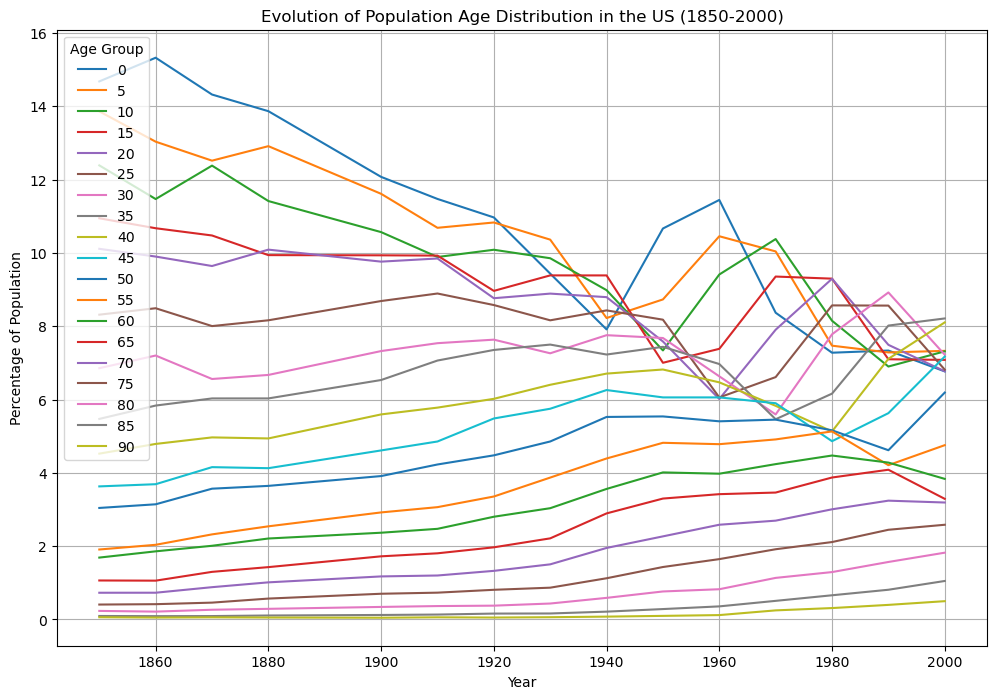

In [71]:

# group the total population for each year and age
year_age_groupby = data.groupby(['year','age'], as_index=False)['people'].sum()


# list unique age groups
age_groups = data['age'].unique()


year_age_percentage_list = []

#loop over age_groups and year
for age_group in age_groups:
    for year in year_age_groupby['year'].unique():
        year_age_percentage = []
        year_age_percentage.append(year)
        year_age_percentage.append(age_group)
        
        age_group_value = year_age_groupby[(year_age_groupby['year'] == year) & (year_age_groupby['age'] == age_group)]['people'].tolist()[0]
        year_age_percentage.append((age_group_value / year_groupby[(year_df['year'] == year)]['people'].tolist()[0]) * 100)

        year_age_percentage_list.append(year_age_percentage)


plt.figure(figsize=(12, 8))

year_age_percentage_df = pd.DataFrame(year_age_percentage_list, columns=['year', 'age', 'people'])

# Plot the evolution of the population age distribution over time
for age_group in age_groups:
    plt.plot(year_age_percentage_df['year'].unique(), year_age_percentage_df[(year_age_percentage_df['age'] == age_group)]['people'], label=age_group)

plt.title('Evolution of Population Age Distribution in the US (1850-2000)')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

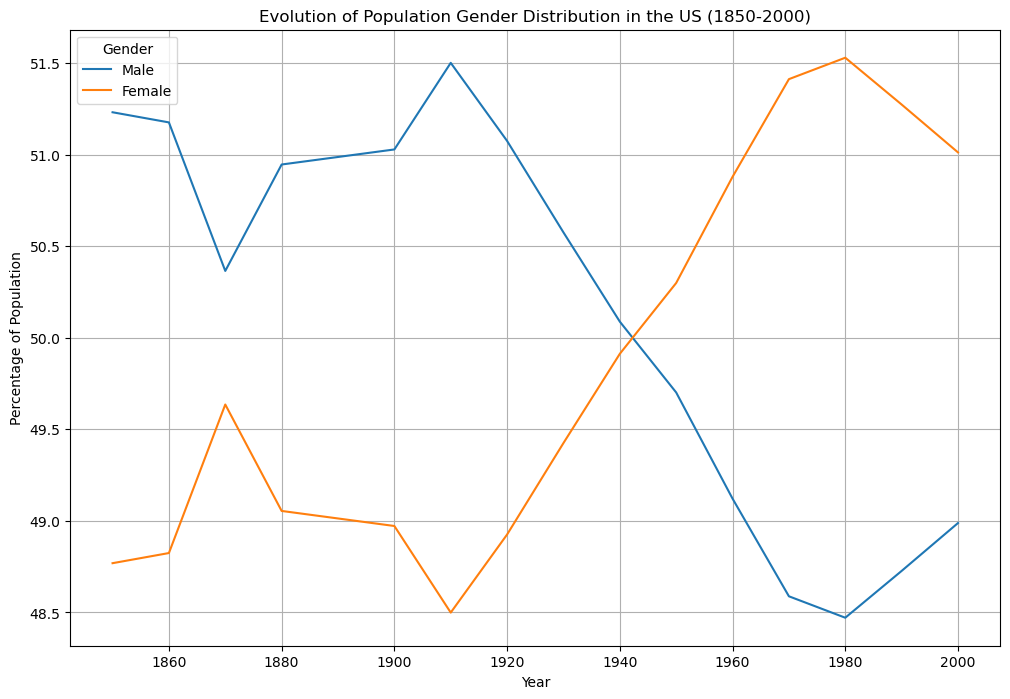

In [72]:

# group the total population for each year and sex
year_sex_groupby = data.groupby(['year','sex'], as_index=False)['people'].sum()


# list unique age groups
sex_groups = data['sex'].unique()


year_sex_percentage_list = []

#loop over age_groups and year
for sex_group in sex_groups:
    for year in year_sex_groupby['year'].unique():
        year_sex_percentage = []
        year_sex_percentage.append(year)
        year_sex_percentage.append(sex_group)
        
        sex_group_value = year_sex_groupby[(year_sex_groupby['year'] == year) & (year_sex_groupby['sex'] == sex_group)]['people'].tolist()[0]
        year_sex_percentage.append((sex_group_value / year_groupby[(year_df['year'] == year)]['people'].tolist()[0]) * 100)

        year_sex_percentage_list.append(year_sex_percentage)


plt.figure(figsize=(12, 8))

year_sex_percentage_df = pd.DataFrame(year_sex_percentage_list, columns=['year', 'sex', 'people'])

# Plot the evolution of the population age distribution over time
for sex_group in sex_groups:
    gender = 'Male' if sex_group == 1 else 'Female'
    plt.plot(year_sex_percentage_df['year'].unique(), year_sex_percentage_df[(year_sex_percentage_df['sex'] == sex_group)]['people'], label=gender)

plt.title('Evolution of Population Gender Distribution in the US (1850-2000)')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.legend(title='Gender')
plt.grid(True)
plt.show()